In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.figure(num=None, figsize=(15, 20), dpi=80, facecolor='w', edgecolor='k')

<Figure size 1200x1600 with 0 Axes>

<Figure size 1200x1600 with 0 Axes>

In [2]:
from utils import *
SPREADSHEET_ID = "1LZCXzBtgey9xv5OH7YGYgp8UMJ27Eyj1aF9IhAW6M6o"

getSheet, updateSheet, sheets, service = authenticateGS()

def getGenes():
    genes = getSheet(SPREADSHEET_ID, "Genes", useFirstRowAsCols=True)
    return genes
genes = getGenes()

In [3]:
prodGenes = genes.groupby("product").count()["id"].to_dict()

In [4]:
perc = {prod: ((~genes[genes["product"]==prod].replace("", np.nan).isna()).sum()/prodGenes[prod]).to_dict() for prod in prodGenes}
#del perc[""]
del perc["The name of the larger gene collection within which the part is contained"]
df = pd.DataFrame(perc)*100
display(df.T.columns)

Index(['id', 'gene_name_short', 'gene_name_long', 'plasmid_name', 'product',
       'backbone', 'sequencing_primer_forward', 'sequencing_primer_reverse',
       'genbank_source_id', 'genbank_source_link', 'genbank_protein_id',
       'genbank_protein_link', 'locus_tag', 'uniprot_link',
       'primary_source_link', 'origin_organism', 'target_organism',
       'description', 'shipping_strain', 'growth_conditions', 'growth_media',
       'growth_antibotic', 'expression_strain', 'expression_promoter',
       'expression_inducer', 'cloning_method', 'cloning_enzyme',
       'cloning_part_type', 'cloning_prefix', 'cloning_suffix',
       'production_sequence', 'plasmid_size', 'insert_sequence',
       'construct_insert_size', 'ori', 'copy_number', 'bsl', 'export_controls',
       'safety_other_information', 'genbank_file_link', 'attribution',
       'citations', 'protocols_and_instructions', 'canary_notice',
       'documentation_image', 'trading_card_link'],
      dtype='object')

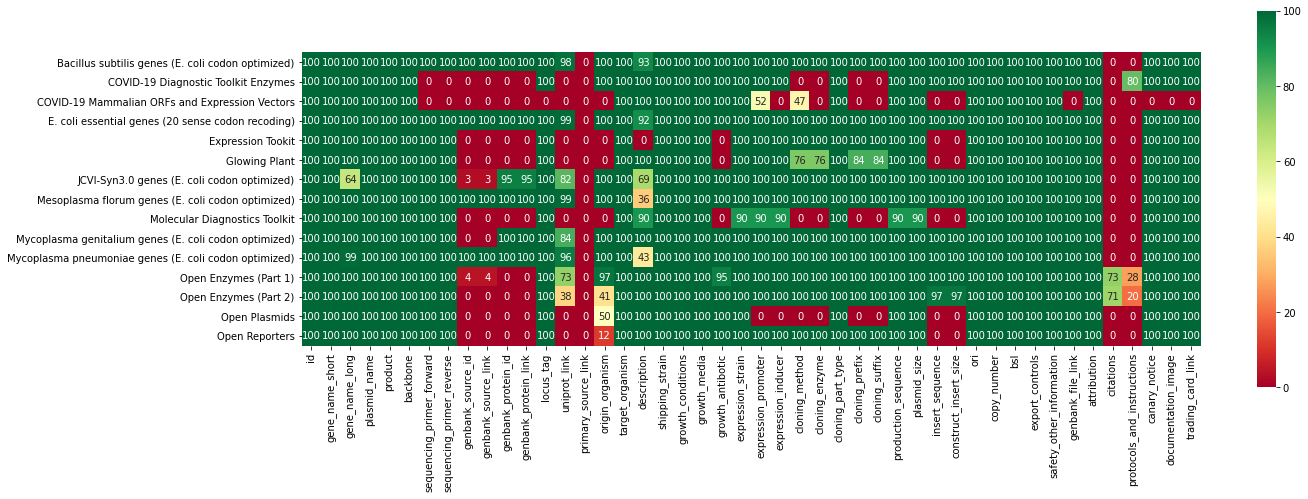

In [5]:
plt.figure(figsize=(20, 7))
sns.heatmap(df.T.astype(int), center=50, cmap="RdYlGn", square=True, annot=True, fmt="d")
plt.tight_layout()
plt.savefig("perc.png", dpi=100)

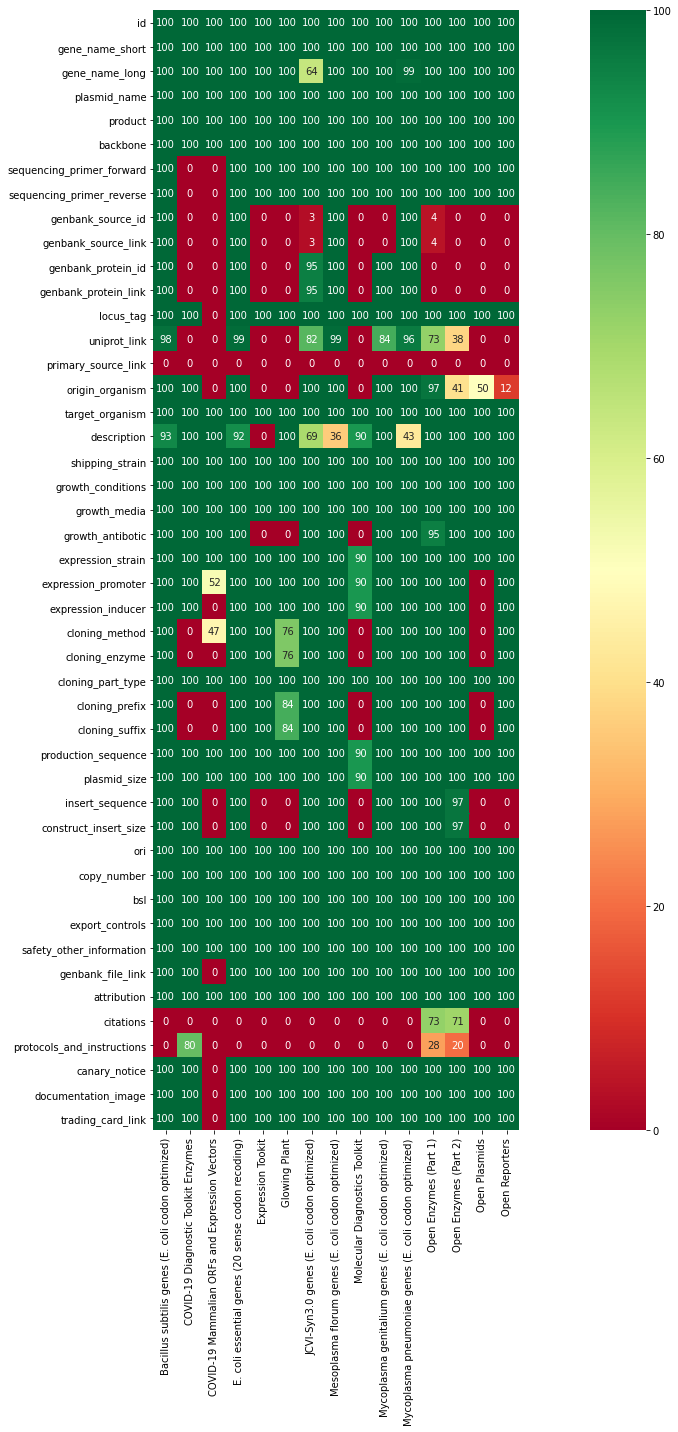

In [6]:
plt.figure(figsize=(20, 20))
sns.heatmap(
    df.astype(int), 
    center=50, cmap="RdYlGn", square=True, annot=True, fmt="d")
plt.tight_layout()
plt.savefig("perc.png", dpi=100)

In [7]:
genes.iloc[1:].groupby("product").count()["id"]

product
Bacillus subtilis genes (E. coli codon optimized)        261
COVID-19 Diagnostic Toolkit Enzymes                        5
COVID-19 Mammalian ORFs and Expression Vectors            53
E. coli essential genes (20 sense codon recoding)        245
Expression Tookit                                        107
Glowing Plant                                             13
JCVI-Syn3.0 genes (E. coli codon optimized)              395
Mesoplasma florum genes (E. coli codon optimized)        573
Molecular Diagnostics Toolkit                             11
Mycoplasma genitalium genes (E. coli codon optimized)    139
Mycoplasma pneumoniae genes (E. coli codon optimized)    189
Open Enzymes (Part 1)                                     45
Open Enzymes (Part 2)                                     39
Open Plasmids                                              2
Open Reporters                                            41
Name: id, dtype: int64